#### load data

In [133]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
np.random.seed(42)

# Features
rainfall = np.random.randint(400, 1000, 30)              # mm
fertilizer = np.random.randint(50, 200, 30)              # kg
soil_quality = np.random.randint(4, 10, 30)              # score (1–10)

# Combine features into a single matrix
X = np.column_stack((rainfall, fertilizer, soil_quality))

# Target variable: Crop Yield (tons/hectare)
# Some polynomial relationship
y = (
    0.005 * rainfall +
    0.04 * fertilizer +
    0.6 * soil_quality +
    0.00001 * rainfall * fertilizer - 
    0.003 * (soil_quality ** 2) +
    np.random.normal(0, 1, 30)  # some noise
)


In [124]:
def make_prediction(x, w, b):
    return np.dot(x, w) + b

In [125]:
def cost_error(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x, w, b)
    error = prediction - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

In [126]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x, w, b)
    error = prediction - y

    dj_dw = (1 / m) * (x.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

In [127]:
def gradient_descents(x, y, w_init, b_init, alpha, iterations):
    w = w_init.copy()
    b = b_init
    cost_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0 or i == iterations - 1:
            cost = cost_error(x, y, w, b)
            cost_history.append(cost)
            print(f"iterations : {iterations}, cost = {cost}, w = {w}, b = {b}")

    return w, b, cost_history

#### Run The Model

In [128]:
w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 0.000001
iterations = 1000

w_final, b_final, cost_history = gradient_descents(X, y, w_init, b_init, alpha, iterations)
predictions = make_prediction(X, w_final, b_final)


iterations : 1000, cost = 27.17335557260574, w = [8.79240631e-03 1.65104688e-03 9.06925668e-05], b = 1.2956562070902251e-05
iterations : 1000, cost = 3.4838310911510866, w = [0.0161471  0.01541031 0.00065238], b = 6.42575679698397e-05
iterations : 1000, cost = 2.562798455585939, w = [0.01452406 0.02484003 0.0010749 ], b = 9.5985169448594e-05
iterations : 1000, cost = 2.006538244535069, w = [0.01326266 0.03216547 0.00146059], b = 0.00012294057072681147
iterations : 1000, cost = 1.6704792055708562, w = [0.01228222 0.03785598 0.00181764], b = 0.00014618652400074785
iterations : 1000, cost = 1.467348509083625, w = [0.01152008 0.0422762  0.0021524 ], b = 0.00016654874583051462
iterations : 1000, cost = 1.3444624667541887, w = [0.01092755 0.04570947 0.00246982], b = 0.0001846687856122644
iterations : 1000, cost = 1.2700176978945428, w = [0.0104668  0.04837591 0.00277374], b = 0.00020104510225646017
iterations : 1000, cost = 1.2248155651120993, w = [0.01010844 0.05044656 0.00306714], b = 0.00

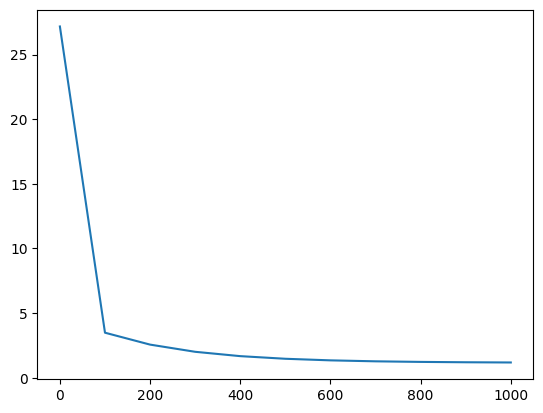

In [129]:
plt.plot(range(0, len(cost_history) * 100, 100), cost_history)

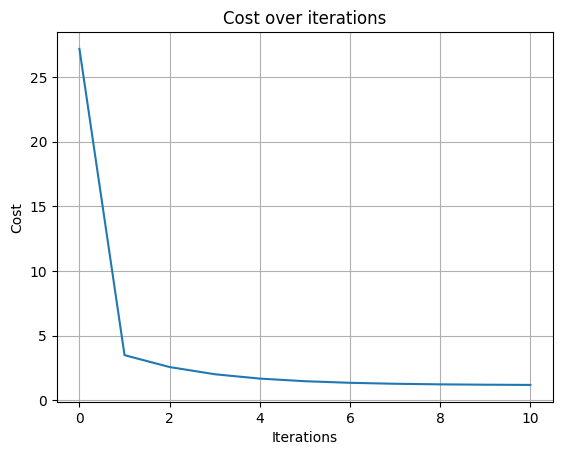

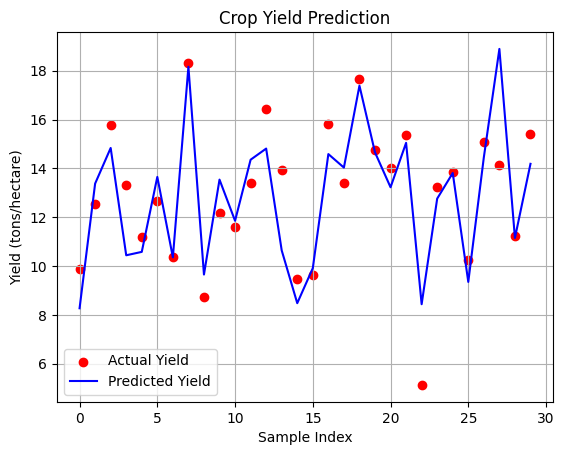

In [130]:
# Cost vs iterations
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.grid(True)
plt.show()

# Predictions vs actual
plt.figure()
plt.scatter(range(len(y)), y, color='red', label='Actual Yield')
plt.plot(range(len(predictions)), predictions, color='blue', label='Predicted Yield')
plt.title("Crop Yield Prediction")
plt.xlabel("Sample Index")
plt.ylabel("Yield (tons/hectare)")
plt.legend()
plt.grid(True)
plt.show()


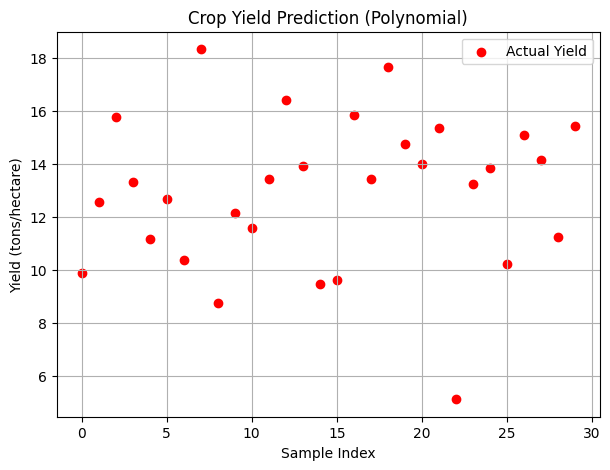

In [135]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.figure(figsize=(7, 5))
# plt.plot(y_pred, color='blue', label='Predicted Yield')
plt.scatter(range(len(y)), y, color='red', label='Actual Yield')
plt.xlabel('Sample Index')
plt.ylabel('Yield (tons/hectare)')
plt.title('Crop Yield Prediction (Polynomial)')
plt.legend()
plt.grid(True)
plt.show()



In [134]:
print("MSE:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

MSE: 0.6053579194708234
R2 Score: 0.9235578313245771
